In [40]:
#importing initial packages
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy as sp
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [41]:
# reading the training dataset and checking it
df = pd.read_csv('kc_house_data_train.csv')
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,2591820310,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,1,7974200820,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,2,7701450110,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,3,9522300010,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,4,9510861140,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [42]:
#checking the datatypes
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [43]:
#checking for null values
df.isna().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [44]:
#removing first column as its useless
#df.drop('Unnamed: 0', axis=1, inplace=True)
#df.drop('id',axis=1,inplace=True)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,20141006T000000,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,0,98058,47.4388,-122.162,2390,7700
1,20140821T000000,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,0,98115,47.6784,-122.285,2370,6283
2,20140815T000000,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,0,98006,47.5646,-122.129,3710,9685
3,20150331T000000,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,0,98034,47.6995,-122.228,4050,14226
4,20140714T000000,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,0,98052,47.6647,-122.083,2250,4050


In [45]:
df.shape

(17290, 20)

In [46]:
df['bedrooms'].value_counts()

3     7864
4     5488
2     2204
5     1283
6      229
1      160
7       30
0       12
8       10
9        5
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [9]:
#some house have a stated value of 0 for bed along with a house that has 33 bedrooms, 
#which has been confirmed to be a mistake. I'll replace all of these with the median of the set.
df['bedrooms'].replace(0,df.bedrooms.median(), inplace=True)
df['bathrooms'].replace(0, df.bathrooms.median(), inplace=True)
df.loc[df.bedrooms > 20, 'bedrooms'] = df.bedrooms.median()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcc3517a978>,
      dtype=object)

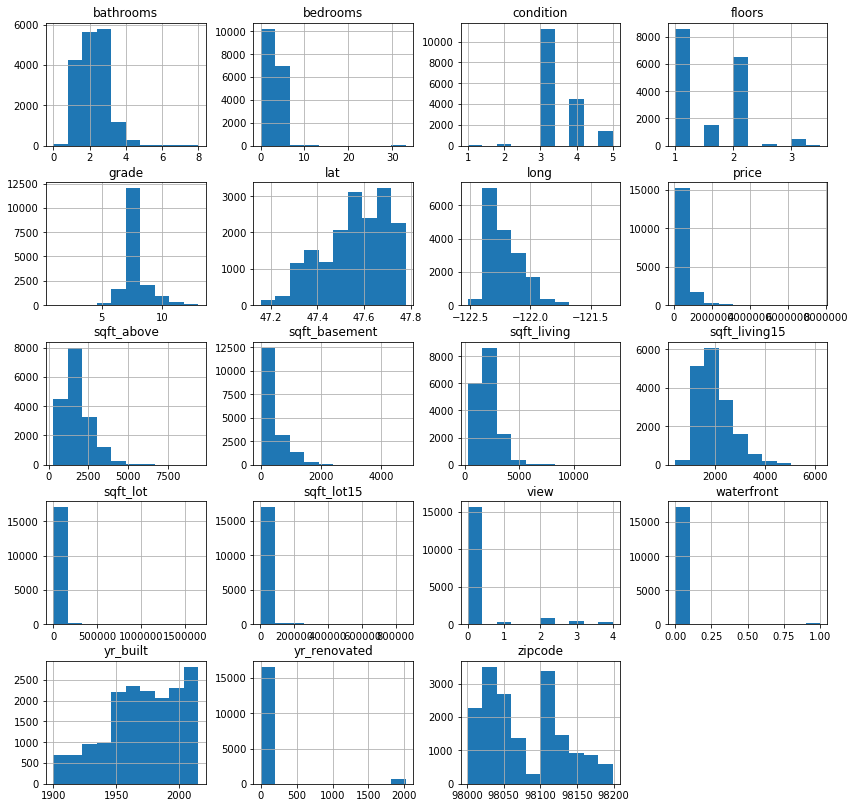

In [47]:
df.hist(figsize=(14,14))

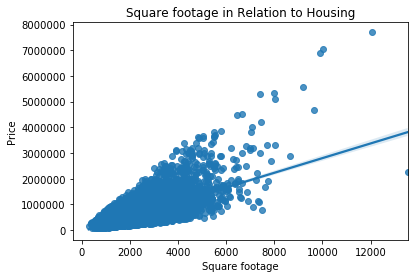

In [11]:
sns.regplot(data=df,x='sqft_living',y='price');
plt.title("Square footage in Relation to Housing");
plt.xlabel("Square footage");
plt.ylabel("Price");


In [48]:
corr = stats.pearsonr(df.sqft_living, df.price)
corr

(0.7035403039789669, 0.0)

In [49]:
#manipulating date column to add year, month, and day columns
df['date'] = df['date'].str.slice(0,8,1)
df['year_sold'] = df['date'].str.slice(0,4,1)
df['month_sold'] = df['date'].str.slice(4,6,1)
df['day_sold'] = df['date'].str.slice(6,8,1)

In [50]:
#changing the datatype of the date columns into integers
df['year_sold'] = df['year_sold'].astype('int64')
df['month_sold'] = df['month_sold'].astype('int64')
df['day_sold'] = df['day_sold'].astype('int64')

In [51]:
df.head()
# df.dtypes
#dropping the original data column
df = df.drop(columns='date')

In [52]:
#replace 0 with yr_built to have some referance as to when it was last renovated
df['yr_renovated'] = df['yr_renovated'].replace(0,df['yr_built'])
#getting a value for renovation
df['years_since_renovation'] = (2020-df['yr_renovated'])
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,years_since_renovation
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,8,2070,0,1986,1986,98058,47.4388,-122.162,2390,7700,2014,10,6,34
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,8,1830,1070,1977,1977,98115,47.6784,-122.285,2370,6283,2014,8,21,43
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,11,3770,0,1997,1997,98006,47.5646,-122.129,3710,9685,2014,8,15,23
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,12,4560,0,1990,1990,98034,47.6995,-122.228,4050,14226,2015,3,31,30
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,9,2550,0,2004,2004,98052,47.6647,-122.083,2250,4050,2014,7,14,16


In [53]:
#Running an Anova test of all predictor variables
formula = 'price ~ C(view) + C(grade) + C(floors) + C(waterfront) + C(bedrooms) + C(bathrooms) + C(condition) + yr_built + yr_renovated + zipcode + sqft_living + sqft_lot + sqft_basement + sqft_living15 + sqft_lot15'
lm = ols(formula, df).fit()
table = sm.stats.anova_lm(lm, type = 2)
print(table)

                    df        sum_sq       mean_sq            F         PR(>F)
C(view)            4.0  4.064221e+14  1.016055e+14  2446.253044   0.000000e+00
C(grade)          11.0  9.880174e+14  8.981976e+13  2162.499160   0.000000e+00
C(floors)          5.0  2.354042e+13  4.708084e+12   113.351763  2.809176e-118
C(waterfront)      1.0  2.390029e+13  2.390029e+13   575.423073  4.165736e-125
C(bedrooms)       12.0  2.838154e+13  2.365128e+12    56.942790  1.002029e-135
C(bathrooms)      29.0  6.697985e+13  2.309650e+12    55.607102  4.289797e-307
C(condition)       4.0  2.282399e+13  5.705998e+12   137.377522  9.272409e-116
yr_built           1.0  6.911258e+13  6.911258e+13  1663.953414   0.000000e+00
yr_renovated       1.0  6.916100e+11  6.916100e+11    16.651191   4.512458e-05
zipcode            1.0  8.090749e+11  8.090749e+11    19.479276   1.023154e-05
sqft_living        1.0  5.298073e+13  5.298073e+13  1275.563143  1.447725e-269
sqft_lot           1.0  2.236220e+12  2.236220e+12  

Text(0, 0.5, 'Probability ')

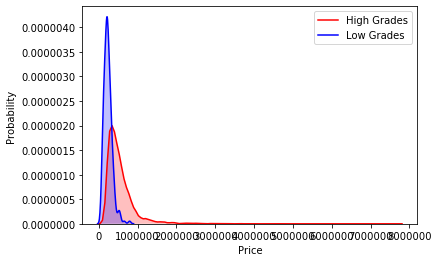

In [54]:
#checking for significant values in catagorical variables
#making dataframe with grades => 6 and <= 5
high_df = df[df.grade >= 6]
low_df = df[df.grade <= 5]
#kernal density plot to show the distribution vs price
sns.kdeplot(df.loc[(df.grade >= 6),'price'],color='r',shade=True, label = 'High Grades')
sns.kdeplot(df.loc[(df.grade <= 5),'price'],color='b',shade=True, label = 'Low Grades')
plt.xlabel('Price')
plt.ylabel('Probability ')

In [55]:
stats.ttest_ind(high_df.price, low_df.price)

Ttest_indResult(statistic=12.019204622472271, pvalue=3.81838048026549e-33)

Text(0, 0.5, 'Probability')

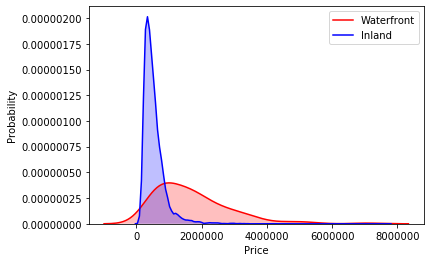

In [56]:
#df with and without waterfront
water_df = df[df.waterfront == 1]
nowater_df = df[df.waterfront == 0]
#second density plot
sns.kdeplot(df.loc[(df.waterfront == 1), 'price'], color='r',shade=True,label='Waterfront')
sns.kdeplot(df.loc[(df.waterfront == 0), 'price'], color='b',shade=True,label='Inland')
plt.xlabel('Price')
plt.ylabel('Probability')

In [57]:
stats.ttest_ind(water_df.price, nowater_df.price)

Ttest_indResult(statistic=37.72330429549608, pvalue=2.465038317654299e-299)

Text(0, 0.5, 'Probability')

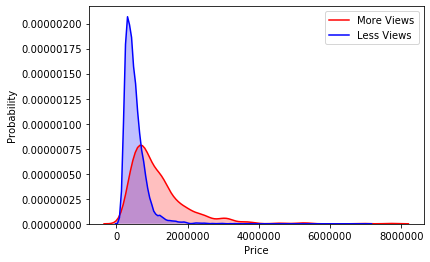

In [58]:
#df for houses with view >= 3 and <=2
more_view_df = df[df.view>=3]
less_view_df = df[df.view<=2]
#3rd density plot
sns.kdeplot(df.loc[(df.view>=3),'price'],color='r',shade=True,label='More Views')
sns.kdeplot(df.loc[(df.view<=2),'price'],color='b',shade=True,label='Less Views')
plt.xlabel('Price')
plt.ylabel('Probability')

In [59]:
stats.ttest_ind(more_view_df.price,less_view_df.price)

Ttest_indResult(statistic=47.664984739824035, pvalue=0.0)

In [60]:
#checking for multicoliniarity
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold,day_sold,years_since_renovation
price,1.000000,0.305106,0.524335,0.703540,0.086803,0.256985,0.275779,0.395485,0.036099,0.666215,0.607760,0.323312,0.056450,0.104812,-0.048958,0.302394,0.019327,0.585567,0.081423,-0.002334,-0.004350,-0.017157,-0.104812
bedrooms,0.305106,1.000000,0.507867,0.570428,0.029375,0.172975,-0.008581,0.079741,0.025266,0.354679,0.472492,0.300085,0.153769,0.162158,-0.147515,-0.002170,0.124279,0.387589,0.026665,-0.011189,0.002560,-0.009122,-0.162158
bathrooms,0.524335,0.507867,1.000000,0.755270,0.085470,0.497967,0.065848,0.188817,-0.122976,0.664191,0.686853,0.282700,0.507761,0.536815,-0.201527,0.023074,0.221308,0.568080,0.086499,-0.030045,0.012950,-0.000155,-0.536815
sqft_living,0.703540,0.570428,0.755270,1.000000,0.166810,0.357169,0.109738,0.283336,-0.061530,0.762929,0.876696,0.435529,0.319397,0.342839,-0.195893,0.052646,0.234453,0.755066,0.179570,-0.033606,0.017737,-0.009618,-0.342839
sqft_lot,0.086803,0.029375,0.085470,0.166810,1.000000,-0.002205,0.015356,0.073058,-0.013715,0.110320,0.180755,0.008065,0.054228,0.052918,-0.126590,-0.082029,0.226190,0.136959,0.701875,0.003141,-0.001722,0.004204,-0.052918
floors,0.256985,0.172975,0.497967,0.357169,-0.002205,1.000000,0.025132,0.025883,-0.259230,0.458984,0.528509,-0.247481,0.483657,0.498899,-0.060560,0.048227,0.128795,0.283933,-0.008170,-0.024641,0.019629,-0.000914,-0.498899
waterfront,0.275779,-0.008581,0.065848,0.109738,0.015356,0.025132,1.000000,0.407565,0.009608,0.092234,0.077162,0.083433,-0.021981,0.005262,0.034282,-0.013331,-0.042728,0.091090,0.026895,-0.000824,0.005685,0.012574,-0.005262
view,0.395485,0.079741,0.188817,0.283336,0.073058,0.025883,0.407565,1.000000,0.045060,0.249554,0.164747,0.279939,-0.049593,-0.020531,0.089475,0.003820,-0.077572,0.279999,0.073185,0.000701,-0.004189,0.013054,0.020531
condition,0.036099,0.025266,-0.122976,-0.061530,-0.013715,-0.259230,0.009608,0.045060,1.000000,-0.142066,-0.157466,0.166923,-0.358921,-0.392758,0.007068,-0.009927,-0.109200,-0.094307,-0.007125,-0.044871,0.017099,-0.006111,0.392758
grade,0.666215,0.354679,0.664191,0.762929,0.110320,0.458984,0.092234,0.249554,-0.142066,1.000000,0.758247,0.165003,0.448003,0.458830,-0.184946,0.116196,0.198369,0.715745,0.116062,-0.036560,0.015166,-0.009128,-0.458830


In [61]:
df_test=df.corr().abs().stack().reset_index().sort_values(0,ascending=False)
df_test['pairs'] = list(zip(df_test.level_0,df_test.level_1))
df_test.set_index(['pairs'], inplace = True)
df_test.drop(columns=['level_1','level_0'], inplace=True)
df_test.columns=['cc']
df_test.drop_duplicates(inplace=True)

In [62]:
df_test[(df_test.cc>.75) & (df_test.cc<1)]

,cc
pairs,
"(yr_built, years_since_renovation)",0.910566
"(sqft_above, sqft_living)",0.876696
"(month_sold, year_sold)",0.781982
"(sqft_living, grade)",0.762929
"(sqft_above, grade)",0.758247
"(bathrooms, sqft_living)",0.755270
"(sqft_living, sqft_living15)",0.755066


In [63]:
#dropping the columns with the most colliniarity  with sqft_living
drop_pairs_df=df.drop(['grade','sqft_above','sqft_living15',],axis=1,)
drop_pairs_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_lot15,year_sold,month_sold,day_sold,years_since_renovation
0,365000.0,4,2.25,2070,8893,2.0,0,0,4,0,1986,1986,98058,47.4388,-122.162,7700,2014,10,6,34
1,865000.0,5,3.00,2900,6730,1.0,0,0,5,1070,1977,1977,98115,47.6784,-122.285,6283,2014,8,21,43
2,1038000.0,4,2.50,3770,10893,2.0,0,2,3,0,1997,1997,98006,47.5646,-122.129,9685,2014,8,15,23
3,1490000.0,3,3.50,4560,14608,2.0,0,2,3,0,1990,1990,98034,47.6995,-122.228,14226,2015,3,31,30
4,711000.0,3,2.50,2550,5376,2.0,0,0,3,0,2004,2004,98052,47.6647,-122.083,4050,2014,7,14,16


In [64]:
#getting dummy variables for catagorical data
month_sold_dummies = pd.get_dummies(drop_pairs_df['month_sold'],prefix='month',drop_first=True)
water_dummies = pd.get_dummies(drop_pairs_df['waterfront'], prefix='waterfront',drop_first=True)
floors_dummies = pd.get_dummies(drop_pairs_df['floors'], prefix='floors',drop_first=True)
view_dummies = pd.get_dummies(drop_pairs_df['view'], prefix='view',drop_first=True)
cond_dummies = pd.get_dummies(drop_pairs_df['condition'],prefix='cond',drop_first=True)
zip_dummies = pd.get_dummies(drop_pairs_df['zipcode'],prefix='zip',drop_first=True)
bed_dummies = pd.get_dummies(drop_pairs_df['bedrooms'],prefix='bed',drop_first=True)
yr_built_dummies = pd.get_dummies(drop_pairs_df['yr_built'],prefix='yrbuilt',drop_first=True)
yr_renovated_dummies = pd.get_dummies(drop_pairs_df['yr_renovated'],prefix='yrren',drop_first=True)
#combine all the new dummy columns into one dataframe
dummie_data = pd.concat([month_sold_dummies, water_dummies,floors_dummies,view_dummies,cond_dummies,bed_dummies,zip_dummies,yr_built_dummies,yr_renovated_dummies],axis=1)
dummie_data.head(1)

,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,waterfront_1,floors_1.5,floors_2.0,floors_2.5,floors_3.0,floors_3.5,view_1,view_2,view_3,view_4,cond_2,cond_3,cond_4,cond_5,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yrbuilt_1901,yrbuilt_1902,yrbuilt_1903,yrbuilt_1904,yrbuilt_1905,yrbuilt_1906,yrbuilt_1907,yrbuilt_1908,yrbuilt_1909,yrbuilt_1910,yrbuilt_1911,yrbuilt_1912,yrbuilt_1913,yrbuilt_1914,yrbuilt_1915,yrbuilt_1916,yrbuilt_1917,yrbuilt_1918,yrbuilt_1919,yrbuilt_1920,yrbuilt_1921,yrbuilt_1922,yrbuilt_1923,yrbuilt_1924,yrbuilt_1925,yrbuilt_1926,yrbuilt_1927,yrbuilt_1928,yrbuilt_1929,yrbuilt_1930,yrbuilt_1931,yrbuilt_1932,yrbuilt_1933,yrbuilt_1934,yrbuilt_1935,yrbuilt_1936,yrbuilt_1937,yrbuilt_1938,yrbuilt_1939,yrbuilt_1940,yrbuilt_1941,yrbuilt_1942,yrbuilt_1943,yrbuilt_1944,yrbuilt_1945,yrbuilt_1946,yrbuilt_1947,yrbuilt_1948,yrbuilt_1949,yrbuilt_1950,yrbuilt_1951,yrbuilt_1952,yrbuilt_1953,yrbuilt_1954,yrbuilt_1955,yrbuilt_1956,yrbuilt_1957,yrbuilt_1958,yrbuilt_1959,yrbuilt_1960,yrbuilt_1961,yrbuilt_1962,yrbuilt_1963,yrbuilt_1964,yrbuilt_1965,yrbuilt_1966,yrbuilt_1967,yrbuilt_1968,yrbuilt_1969,yrbuilt_1970,yrbuilt_1971,yrbuilt_1972,yrbuilt_1973,yrbuilt_1974,yrbuilt_1975,yrbuilt_1976,yrbuilt_1977,yrbuilt_1978,yrbuilt_1979,yrbuilt_1980,yrbuilt_1981,yrbuilt_1982,yrbuilt_1983,yrbuilt_1984,yrbuilt_1985,yrbuilt_1986,yrbuilt_1987,yrbuilt_1988,yrbuilt_1989,yrbuilt_1990,yrbuilt_1991,yrbuilt_1992,yrbuilt_1993,yrbuilt_1994,yrbuilt_1995,yrbuilt_1996,yrbuilt_1997,yrbuilt_1998,yrbuilt_1999,yrbuilt_2000,yrbuilt_2001,yrbuilt_2002,yrbuilt_2003,yrbuilt_2004,yrbuilt_2005,yrbuilt_2006,yrbuilt_2007,yrbuilt_2008,yrbuilt_2009,yrbuilt_2010,yrbuilt_2011,yrbuilt_2012,yrbuilt_2013,yrbuilt_2014,yrbuilt_2015,yrren_1901,yrren_1902,yrren_1903,yrren_1904,yrren_1905,yrren_1906,yrren_1907,yrren_1908,yrren_1909,yrren_1910,yrren_1911,yrren_1912,yrren_1913,yrren_1914,yrren_1915,yrren_1916,yrren_1917,yrren_1918,yrren_1919,yrren_1920,yrren_1921,yrren_1922,yrren_1923,yrren_1924,yrren_1925,yrren_1926,yrren_1927,yrren_1928,yrren_1929,yrren_1930,yrren_1931,yrren_1932,yrren_1933,yrren_1934,yrren_1935,yrren_1936,yrren_1937,yrren_1938,yrren_1939,yrren_1940,yrren_1941,yrren_1942,yrren_1943,yrren_1944,yrren_1945,yrren_1946,yrren_1947,yrren_1948,yrren_1949,yrren_1950,yrren_1951,yrren_1952,yrren_1953,yrren_1954,yrren_1955,yrren_1956,yrren_1957,yrren_1958,yrren_1959,yrren_1960,yrren_1961,yrren_1962,yrren_1963,yrren_1964,yrren_1965,yrren_1966,yrren_1967,yrren_1968,yrren_1969,yrren_1970,yrren_1971,yrren_1972,yrren_1973,yrren_1974,yrren_1975,yrren_1976,yrren_1977,yrren_1978,yrren_1979,yrren_1980,yrren_1981,yrren_1982,yrren_1983,yrren_1984,yrren_1985,yrren_1986,yrren_1987,yrren_1988,yrren_1989,yrren_1990,yrren_1991,yrren_1992,yrren_1993,yrren_1994,yrren_1995,yrren_1996,yrren_1997,yrren_1998,yrren_1999,yrren_2000,yrren_2001,yrren_2002,yrren_2003,yrren_2004,yrren_2005,yrren_2006,yrren_2007,yrren_2008,yrren_2009,yrren_2010,yrren_2011,yrren_2012,yrren_2013,yrren_2014,yrren_2015
0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [65]:
#drop catagorical predictor columns
clean_drop_train = drop_pairs_df.drop(['bedrooms','floors','waterfront','view','condition','yr_built','yr_renovated','zipcode',],axis=1)
#scaled the values of continous predictors
scaler = StandardScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(clean_drop_train[['sqft_living','sqft_basement','lat','long']]),columns=['sqft_living','sqft_basement','lat','long'])

In [66]:
#create a new dataframe with the scaled predictors, dummies and target variable
ols_1 = pd.concat([clean_drop_train['price'],scaled_df, dummie_data], axis=1)
#renamed columns of some floor dummies to avoid syntax error
ols_1.rename(columns={'floors_3.0':'floors_3'}, inplace=True)
ols_1.rename(columns={'floors_3.5':'floors_3_5'}, inplace=True)
ols_1.rename(columns={'floors_1.5':'floors_1_5'}, inplace=True)
ols_1.rename(columns={'floors_2.0':'floors_2'}, inplace=True)
ols_1.rename(columns={'floors_2.5':'floors_2_5'}, inplace=True)
ols_1.rename(columns={'bed_2.0':'bed_2'}, inplace=True)
ols_1.rename(columns={'bed_3.0':'bed_3'}, inplace=True)
ols_1.rename(columns={'bed_4.0':'bed_4'}, inplace=True)
ols_1.rename(columns={'bed_5.0':'bed_5'}, inplace=True)
ols_1.rename(columns={'bed_6.0':'bed_6'}, inplace=True)
ols_1.rename(columns={'bed_7.0':'bed_7'}, inplace=True)
ols_1.rename(columns={'bed_8.0':'bed_8'}, inplace=True)
ols_1.rename(columns={'bed_9.0':'bed_9'}, inplace=True)
ols_1.rename(columns={'bed_10.0':'bed_10'}, inplace=True)
ols_1.rename(columns={'bed_11.0':'bed_11'}, inplace=True)

ols_1.head(1)

,price,sqft_living,sqft_basement,lat,long,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,waterfront_1,floors_1_5,floors_2,floors_2_5,floors_3,floors_3_5,view_1,view_2,view_3,view_4,cond_2,cond_3,cond_4,cond_5,bed_1,bed_2,bed_3,bed_4,bed_5,bed_6,bed_7,bed_8,bed_9,bed_10,bed_11,bed_33,zip_98002,zip_98003,zip_98004,zip_98005,zip_98006,zip_98007,zip_98008,zip_98010,zip_98011,zip_98014,zip_98019,zip_98022,zip_98023,zip_98024,zip_98027,zip_98028,zip_98029,zip_98030,zip_98031,zip_98032,zip_98033,zip_98034,zip_98038,zip_98039,zip_98040,zip_98042,zip_98045,zip_98052,zip_98053,zip_98055,zip_98056,zip_98058,zip_98059,zip_98065,zip_98070,zip_98072,zip_98074,zip_98075,zip_98077,zip_98092,zip_98102,zip_98103,zip_98105,zip_98106,zip_98107,zip_98108,zip_98109,zip_98112,zip_98115,zip_98116,zip_98117,zip_98118,zip_98119,zip_98122,zip_98125,zip_98126,zip_98133,zip_98136,zip_98144,zip_98146,zip_98148,zip_98155,zip_98166,zip_98168,zip_98177,zip_98178,zip_98188,zip_98198,zip_98199,yrbuilt_1901,yrbuilt_1902,yrbuilt_1903,yrbuilt_1904,yrbuilt_1905,yrbuilt_1906,yrbuilt_1907,yrbuilt_1908,yrbuilt_1909,yrbuilt_1910,yrbuilt_1911,yrbuilt_1912,yrbuilt_1913,yrbuilt_1914,yrbuilt_1915,yrbuilt_1916,yrbuilt_1917,yrbuilt_1918,yrbuilt_1919,yrbuilt_1920,yrbuilt_1921,yrbuilt_1922,yrbuilt_1923,yrbuilt_1924,yrbuilt_1925,yrbuilt_1926,yrbuilt_1927,yrbuilt_1928,yrbuilt_1929,yrbuilt_1930,yrbuilt_1931,yrbuilt_1932,yrbuilt_1933,yrbuilt_1934,yrbuilt_1935,yrbuilt_1936,yrbuilt_1937,yrbuilt_1938,yrbuilt_1939,yrbuilt_1940,yrbuilt_1941,yrbuilt_1942,yrbuilt_1943,yrbuilt_1944,yrbuilt_1945,yrbuilt_1946,yrbuilt_1947,yrbuilt_1948,yrbuilt_1949,yrbuilt_1950,yrbuilt_1951,yrbuilt_1952,yrbuilt_1953,yrbuilt_1954,yrbuilt_1955,yrbuilt_1956,yrbuilt_1957,yrbuilt_1958,yrbuilt_1959,yrbuilt_1960,yrbuilt_1961,yrbuilt_1962,yrbuilt_1963,yrbuilt_1964,yrbuilt_1965,yrbuilt_1966,yrbuilt_1967,yrbuilt_1968,yrbuilt_1969,yrbuilt_1970,yrbuilt_1971,yrbuilt_1972,yrbuilt_1973,yrbuilt_1974,yrbuilt_1975,yrbuilt_1976,yrbuilt_1977,yrbuilt_1978,yrbuilt_1979,yrbuilt_1980,yrbuilt_1981,yrbuilt_1982,yrbuilt_1983,yrbuilt_1984,yrbuilt_1985,yrbuilt_1986,yrbuilt_1987,yrbuilt_1988,yrbuilt_1989,yrbuilt_1990,yrbuilt_1991,yrbuilt_1992,yrbuilt_1993,yrbuilt_1994,yrbuilt_1995,yrbuilt_1996,yrbuilt_1997,yrbuilt_1998,yrbuilt_1999,yrbuilt_2000,yrbuilt_2001,yrbuilt_2002,yrbuilt_2003,yrbuilt_2004,yrbuilt_2005,yrbuilt_2006,yrbuilt_2007,yrbuilt_2008,yrbuilt_2009,yrbuilt_2010,yrbuilt_2011,yrbuilt_2012,yrbuilt_2013,yrbuilt_2014,yrbuilt_2015,yrren_1901,yrren_1902,yrren_1903,yrren_1904,yrren_1905,yrren_1906,yrren_1907,yrren_1908,yrren_1909,yrren_1910,yrren_1911,yrren_1912,yrren_1913,yrren_1914,yrren_1915,yrren_1916,yrren_1917,yrren_1918,yrren_1919,yrren_1920,yrren_1921,yrren_1922,yrren_1923,yrren_1924,yrren_1925,yrren_1926,yrren_1927,yrren_1928,yrren_1929,yrren_1930,yrren_1931,yrren_1932,yrren_1933,yrren_1934,yrren_1935,yrren_1936,yrren_1937,yrren_1938,yrren_1939,yrren_1940,yrren_1941,yrren_1942,yrren_1943,yrren_1944,yrren_1945,yrren_1946,yrren_1947,yrren_1948,yrren_1949,yrren_1950,yrren_1951,yrren_1952,yrren_1953,yrren_1954,yrren_1955,yrren_1956,yrren_1957,yrren_1958,yrren_1959,yrren_1960,yrren_1961,yrren_1962,yrren_1963,yrren_1964,yrren_1965,yrren_1966,yrren_1967,yrren_1968,yrren_1969,yrren_1970,yrren_1971,yrren_1972,yrren_1973,yrren_1974,yrren_1975,yrren_1976,yrren_1977,yrren_1978,yrren_1979,yrren_1980,yrren_1981,yrren_1982,yrren_1983,yrren_1984,yrren_1985,yrren_1986,yrren_1987,yrren_1988,yrren_1989,yrren_1990,yrren_1991,yrren_1992,yrren_1993,yrren_1994,yrren_1995,yrren_1996,yrren_1997,yrren_1998,yrren_1999,yrren_2000,yrren_2001,yrren_2002,yrren_2003,yrren_2004,yrren_2005,yrren_2006,yrren_2007,yrren_2008,yrren_2009,yrren_2010,yrren_2011,yrren_2012,yrren_2013,yrren_2014,yrren_2015
0,365000.0,-0.012462,-0.659293,-0.87609,0.371013,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [67]:
#select target variable 
outcome = 'price'
#seperate target from the predictors
predictors = ols_1.drop('price',axis=1)
#place a + between each predictor column name
pred_sum = '+'.join(predictors.columns)
#place a ~ between the target and the predictor sum and save as variable formula
formula = outcome + '~' + pred_sum

In [68]:
#ols model using the new dataframe
model_1 = ols(formula=formula, data=ols_1).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.808
Model:                            OLS   Adj. R-squared:                  0.804
Method:                 Least Squares   F-statistic:                     209.3
Date:                Sat, 05 Dec 2020   Prob (F-statistic):               0.00
Time:                        22:14:02   Log-Likelihood:            -2.3212e+05
No. Observations:               17290   AIC:                         4.649e+05
Df Residuals:                   16949   BIC:                         4.676e+05
Df Model:                         340                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      3.823e+05   6.57e+04      5.820      0.000    2.54e+05    5.11e+05
sqft_living    2.603e+05   2307.377    112.812      0.000    2.56e+05    2.65e+05
sqft_basement -4.803e+04   1858.420    -25.846      0.000   -5.17e+04   -4.44e+04
lat            4.052e+04   1.02e+04      3.991      0.000    2.06e+04    6.04e+04
long           -2.36e+04   7362.826     -3.206      0.001    -3.8e+04   -9170.344
month_2         197.2816   7959.311      0.025      0.980   -1.54e+04    1.58e+04
month_3        2.264e+04   7328.941      3.089      0.002    8270.391     3.7e+04
month_4        3.204e+04   7113.791      4.504      0.000    1.81e+04     4.6e+04
month_5        1140.6170   7053.054      0.162      0.872   -1.27e+04     1.5e+04
month_6        1488.5815   7153.203      0.208      0.835   -1.25e+04    1.55e+04
month_7       -8210.0524   7154.057     -1.148      0.251   -2.22e+04    5812.643
month_8       -2579.6565   7292.230     -0.354      0.724   -1.69e+04    1.17e+04
month_9       -1.386e+04   7436.098     -1.864      0.062   -2.84e+04     711.528
month_10      -5051.5814   7348.128     -0.687      0.492   -1.95e+04    9351.513
month_11       -1.14e+04   7701.868     -1.481      0.139   -2.65e+04    3692.196
month_12      -8815.3197   7683.668     -1.147      0.251   -2.39e+04    6245.468
waterfront_1   5.757e+05   1.82e+04     31.554      0.000     5.4e+05    6.11e+05
floors_1_5    -4.671e+04   5475.021     -8.532      0.000   -5.74e+04    -3.6e+04
floors_2      -6.317e+04   4591.294    -13.758      0.000   -7.22e+04   -5.42e+04
floors_2_5     4.386e+04   1.52e+04      2.884      0.004    1.41e+04    7.37e+04
floors_3      -9.618e+04   9854.974     -9.760      0.000   -1.16e+05   -7.69e+04
floors_3_5     2004.5596    6.4e+04      0.031      0.975   -1.23e+05    1.27e+05
view_1         8.557e+04   1.06e+04      8.071      0.000    6.48e+04    1.06e+05
view_2         9.076e+04   6394.866     14.192      0.000    7.82e+04    1.03e+05
view_3         1.732e+05   8793.598     19.699      0.000    1.56e+05     1.9e+05
view_4         3.748e+05   1.32e+04     28.391      0.000    3.49e+05    4.01e+05
cond_2         1.063e+05    3.7e+04      2.875      0.004    3.38e+04    1.79e+05
cond_3         1.001e+05   3.43e+04      2.914      0.004    3.28e+04    1.67e+05
cond_4         1.246e+05   3.44e+04      3.626      0.000    5.72e+04    1.92e+05
cond_5         1.723e+05   3.45e+04      4.986      0.000    1.05e+05     2.4e+05
bed_1         -4510.7301   5.03e+04     -0.090      0.929   -1.03e+05    9.41e+04
bed_2         -1.958e+04   4.86e+04     -0.403      0.687   -1.15e+05    7.57e+04
bed_3         -4.217e+04   4.85e+04     -0.870      0.385   -1.37e+05    5.29e+04
bed_4          -8.18e+04   4.86e+04     -1.684      0.092   -1.77e+05    1.34e+04
bed_5         -1.019e+05   4.88e+04     -2.089   

In [69]:
#Train test split train data
y = ols_1[['price']]
x = ols_1.drop(['price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)



linreg = LinearRegression()
linreg.fit(x_train, y_train)
#predict on test data
y_hat_train_1 = linreg.predict(x_train)
y_hat_test_1 = linreg.predict(x_test)
# calculate RMSE
train_mse_1 = (mean_squared_error(y_train, y_hat_train_1))**.5
test_mse_1 = (mean_squared_error(y_test, y_hat_test_1))**.5
print('train_mse_1',train_mse_1,'test_mse_1',test_mse_1)

train_mse_1 164561.07284580683 test_mse_1 163888.61869603183


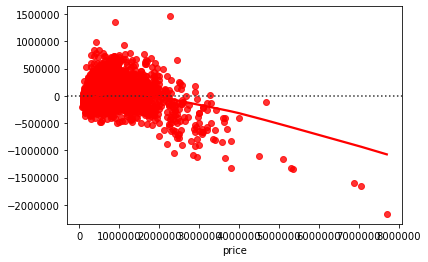

In [70]:
# plot showing the risiduals of a liniear regression
sns.residplot(y_train, y_hat_train_1, lowess=True, color='r')

In [71]:
target = ols_1[['price']]
x = ols_1.drop(['price'], axis=1)

lm = LinearRegression()
lm = lm.fit(x, target)

In [38]:
import pickle
pickle_out = open('model.pickle', 'wb')
pickle.dump(lm,pickle_out)
pickle_out.close()

In [39]:
pickle_out = open('scaler.pickle','wb')
pickle.dump(scaler, pickle_out)
pickle_out.close()